In [1]:
import pickle

mcicdir = '/home/anton/Documents/Tulane/Research/MCIC/'

ts = pickle.load(open(f'{mcicdir}/MCIC_raw_ts.pkl', 'rb'))

print(len(ts))

2049


In [6]:
import numpy as np
from scipy import signal

def butter_bandpass(cutoff, fs, order=5):
    normal_cutoff = [cutoff[0], cutoff[1]]
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False, fs=fs)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

tr = 2

ts_filt = dict()
ps = dict()

for sub in ts:
    try:
        filt = butter_bandpass_filter(ts[sub], [0.01, 0.15], 1/tr)
    except:
        print(f'Bad filt {sub}')
        continue
    p = np.corrcoef(filt)
    if np.sum(np.isnan(p)) > 0:
        print(f'Bad subject {sub}')
        continue
    ps[sub] = p
    ts_filt[sub] = filt
    
print(len(ts_filt))

Bad filt sub-A00036137_ses-20040101_task-auditoryoddball_run-01_bold
Bad subject sub-A00036170_ses-20040101_task-sternbergitemrecognition_run-01_bold
Bad subject sub-A00036210_ses-20040101_task-sternbergitemrecognition_run-03_bold
Bad filt sub-A00036196_ses-20040101_task-auditoryoddball_run-01_bold
Bad subject sub-A00036403_ses-20050101_task-sensorymotor_run-02_bold
Bad filt sub-A00036421_ses-20050101_task-sensorymotor_run-01_bold
Bad subject sub-A00036427_ses-20050101_task-sternbergitemrecognition_run-03_bold
Bad subject sub-A00036455_ses-20050101_task-auditoryoddball_run-04_bold
Bad subject sub-A00036455_ses-20050101_task-breathhold_run-01_bold
Bad subject sub-A00036455_ses-20050101_task-sensorymotor_run-02_bold
Bad subject sub-A00036455_ses-20050101_task-sternbergitemrecognition_run-02_bold
Bad subject sub-A00036455_ses-20050101_task-sternbergitemrecognition_run-03_bold
Bad subject sub-A00036455_ses-20050101_task-auditoryoddball_run-01_bold
Bad subject sub-A00036466_ses-20050101_tas

In [76]:
# Save filtered TS

pickle.dump(ts_filt, open(f'{mcicdir}/MCIC_good_filt_ts.pkl', 'wb'))

print('Complete')

Complete


In [ ]:
# Combine tasks

for sub in ts_filt

In [85]:
# Combine all FC for subjects

import re

comb = dict()
lens = dict()

for sub in ts_filt:
    m = re.search('sub-(A[^_]+)', sub)
    s = m.group(1)
    if s not in comb:
        comb[s] = [ps[sub][a,b]]
        lens[s] = [ts_filt[sub].shape[1]]
    else:
        comb[s].append(ps[sub][a,b])
        lens[s].append(ts_filt[sub].shape[1])
    
print(len(comb))
print(len(lens))

210
210


In [89]:
def cat(lst, **kwargs):
    return np.concatenate(lst, **kwargs)

aveps = dict()

for sub in comb:
    tot = sum(lens[sub])
    fracs = [le/tot for le in lens[sub]]
    p = sum([p*f for p,f in zip(comb[sub], fracs)])
    aveps[sub] = p
    
print(len(aveps))

210


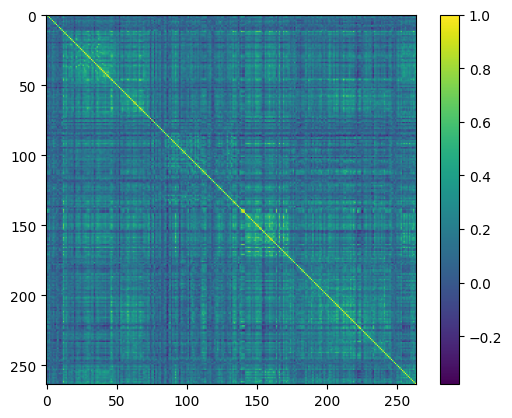

In [106]:
uniqsubs = natsorted(list(aveps.keys()))

plt.imshow(aveps[uniqsubs[16]])
plt.colorbar()
plt.show()

In [109]:
# Save to ImageNomer directory

imagedir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/MCIC'

a,b = np.triu_indices(264,1)

for sub in aveps:
    np.save(f'{imagedir}/fc/{sub}_task-combined_fc.npy', aveps[sub][a,b])
    
print('Complete')

Complete


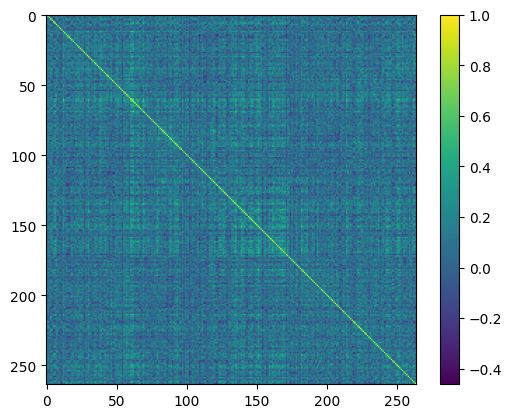

In [75]:
import matplotlib.pyplot as plt
from natsort import natsorted

# subs = natsorted(list(ps.keys()))

plt.imshow(ps[subs[29]])
plt.colorbar()
plt.show()

In [68]:
def cat(lst, **kwargs):
    return np.concatenate(lst, **kwargs)

tsnew = cat([ts_filt[a] for a in subs[22:30]], axis=1)
pnew = np.corrcoef(tsnew)

In [58]:
ts[subs[1]].shape

(264, 37)

In [51]:
subs[20:30]

['sub-A00036109_ses-20060101_task-sternbergitemrecognition_run-02_bold',
 'sub-A00036109_ses-20060101_task-sternbergitemrecognition_run-03_bold',
 'sub-A00036111_ses-20060101_task-auditoryoddball_run-01_bold',
 'sub-A00036111_ses-20060101_task-auditoryoddball_run-02_bold',
 'sub-A00036111_ses-20060101_task-auditoryoddball_run-03_bold',
 'sub-A00036111_ses-20060101_task-auditoryoddball_run-04_bold',
 'sub-A00036111_ses-20060101_task-breathhold_run-01_bold',
 'sub-A00036111_ses-20060101_task-sensorymotor_run-01_bold',
 'sub-A00036111_ses-20060101_task-sensorymotor_run-02_bold',
 'sub-A00036111_ses-20060101_task-sternbergitemrecognition_run-01_bold']

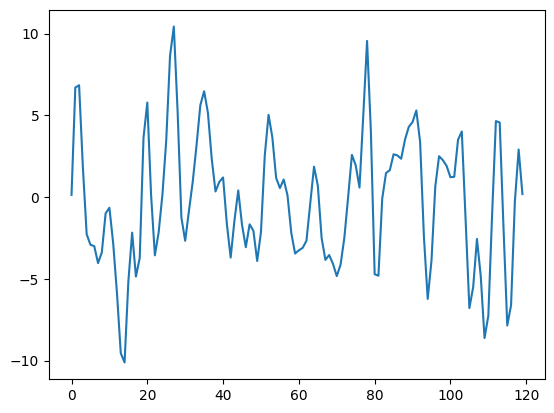

In [83]:
plt.plot(ts_filt[subs[1900]][0])
plt.show()